In [1]:
import redback
from  redback.transient_models.afterglow_models import tophat
from  redback.transient_models.afterglow_models import tophat_from_emulator, tophat_redback
from redback_surrogates.afterglowmodels import tophat_emulator
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
%load_ext line_profiler
import pickle
from scipy import interpolate

In [158]:
params={}

params['av'] = 0.5
params['loge0'] = 49.5
params['logn0'] = 0.5 
params['p'] = 2.3
params['logepse'] = -1.25
params['logepsb'] = -2.5
params['g0'] = 1000
params['thv']= 0.5
params['thc'] = 0.06
params['output_format']='flux_density'
#params['frequency']=3e14

from scipy.signal import savgol_filter
time=np.linspace(0.1,40,200)
flux2 = tophat_from_emulator(time, **params, frequency=3e14)
flux2pt1=flux2[:np.argmax(flux2)]
flux2pt2=flux2[np.argmax(flux2):]
flux2pt2=savgol_filter(flux2pt2,window_length=10,polyorder=6, mode='nearest')
flux3=np.insert(flux2pt1, len(flux2pt1), flux2pt2)
params['redshift']=0.01
params['xiN']=1
flux = tophat_redback(time, **params, frequency=3e14)


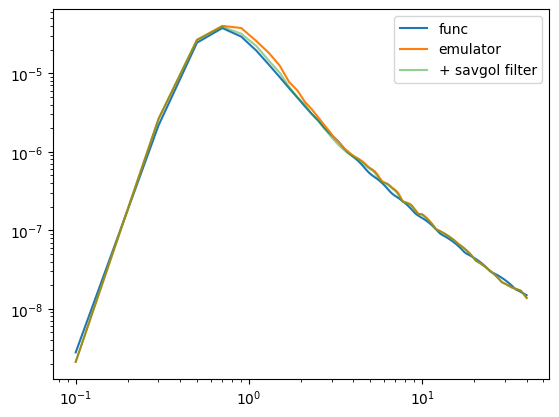

In [159]:
ax=plt.subplot()
ax.loglog(time, flux, label='func')
ax.loglog(time, flux2, label='emulator')# marker='o', markersize=1, alpha=0.7)
ax.loglog(time,flux3, label='+ savgol filter', alpha=0.5)
#plt.xlim(100,110)
plt.legend()
plt.show()

In [22]:
%%timeit 
flux2 = tophat_from_emulator(time, **params, frequency=3e14)

1.17 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [23]:
%%timeit
flux = tophat_redback(time, **params, frequency=3e14)

30.3 ms ± 4.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%lprun -f tophat_emulator flux2 = tophat_from_emulator(time, **params, frequency=3e14)

Timer unit: 1e-09 s

Total time: 0.0259628 s
File: /home/wfw23/redback_surrogates/redback_surrogates/afterglowmodels.py
Function: tophat_emulator at line 14

Line #      Hits         Time  Per Hit   % Time  Line Contents
    14                                           def tophat_emulator(new_time, test_data):
    15                                               """
    16                                               tophat afterglow model using trained mpl regressor
    17                                           
    18                                               :param new_time: time in days in observer frame to evaluate at
    19                                               :param test_data: array of shape (n samples, 9 features), where 9 features corresponds to the tophat params excluding redshift and ksin, fixed at 0.01 and 1
    20                                                   The 9 features must be preprocessed and given in order of log10(thv) , loge0 , log10(thc), log

In [34]:
%lprun -f tophat_emulator flux2 = tophat_from_emulator(time, **params, frequency=np.linspace(3e13, 5e14, 200))

Timer unit: 1e-09 s

Total time: 0.0243051 s
File: /home/wfw23/redback_surrogates/redback_surrogates/afterglowmodels.py
Function: tophat_emulator at line 14

Line #      Hits         Time  Per Hit   % Time  Line Contents
    14                                           def tophat_emulator(new_time, test_data):
    15                                               """
    16                                               tophat afterglow model using trained mpl regressor
    17                                           
    18                                               :param new_time: time in days in observer frame to evaluate at
    19                                               :param test_data: array of shape (n samples, 9 features), where 9 features corresponds to the tophat params excluding redshift and ksin, fixed at 0.01 and 1
    20                                                   The 9 features must be preprocessed and given in order of log10(thv) , loge0 , log10(thc), log

In [35]:
%lprun -f tophat_redback flux = tophat_redback(time, **params, frequency=3e14)

Timer unit: 1e-09 s

Total time: 0.064769 s
File: /home/wfw23/redback/redback/transient_models/afterglow_models.py
Function: tophat_redback at line 835

Line #      Hits         Time  Per Hit   % Time  Line Contents
   835                                           @citation_wrapper('redback, https://ui.adsabs.harvard.edu/abs/2018MNRAS.481.2581L/abstract')
   836                                           def tophat_redback(time, redshift, thv, loge0, thc, logn0, p, logepse, logepsb, g0, xiN, **kwargs):
   837                                               """
   838                                               A tophat model implemented directly in redback. Based on Lamb, Mandel & Resmi 2018 and other work.
   839                                               Look at the RedbackAfterglow class for more details/implementation.
   840                                           
   841                                               :param time: time in days
   842                            

In [36]:
%lprun -f tophat_emulator flux2 = tophat_from_emulator(time, **params, frequency=np.linspace(3e13, 5e14, 100))

Timer unit: 1e-09 s

Total time: 0.0580897 s
File: /home/wfw23/redback_surrogates/redback_surrogates/afterglowmodels.py
Function: tophat_emulator at line 14

Line #      Hits         Time  Per Hit   % Time  Line Contents
    14                                           def tophat_emulator(new_time, test_data):
    15                                               """
    16                                               tophat afterglow model using trained mpl regressor
    17                                           
    18                                               :param new_time: time in days in observer frame to evaluate at
    19                                               :param test_data: array of shape (n samples, 9 features), where 9 features corresponds to the tophat params excluding redshift and ksin, fixed at 0.01 and 1
    20                                                   The 9 features must be preprocessed and given in order of log10(thv) , loge0 , log10(thc), log

In [162]:
with open("tophat_redback.pkl", "rb") as f:
    model = pickle.load(f)
with open("scalery_redback.pkl", "rb") as sy:
    scalery = pickle.load(sy)
with open("scalerx_redback.pkl", "rb") as sx:
    scalerx = pickle.load(sx)

In [163]:
with open("tophat_redback2.pkl", "rb") as f:
    model2 = pickle.load(f)
with open("scalery_redback2.pkl", "rb") as sy:
    scalery2 = pickle.load(sy)
with open("scalerx_redback2.pkl", "rb") as sx:
    scalerx2 = pickle.load(sx)

In [164]:
with open("tophat_redback3.pkl", "rb") as f:
    model3 = pickle.load(f)
with open("scalery_redback3.pkl", "rb") as sy:
    scalery3 = pickle.load(sy)
with open("scalerx_redback3.pkl", "rb") as sx:
    scalerx3 = pickle.load(sx)

In [165]:
with open("tophat_redback4.pkl", "rb") as f:
    model4 = pickle.load(f)
with open("scalery_redback4.pkl", "rb") as sy:
    scalery4 = pickle.load(sy)
with open("scalerx_redback4.pkl", "rb") as sx:
    scalerx4 = pickle.load(sx)

In [166]:
#time1
time1 = np.linspace(0.1, 1, 10) #20 pints bewteen 0.1 and 1 day
time1=np.insert(time1,10,np.linspace(1.2,10,20))
time1=np.insert(time1,30,np.linspace(12,300,70))

In [167]:
#time2
time2 = np.linspace(0.1, 1, 10) #20 pints bewteen 0.1 and 1 day
time2=np.insert(time2,10,np.linspace(1.2,10,30))
time2=np.insert(time2,40,np.linspace(12,300,110))

In [168]:
#time3
time3 = np.linspace(0.1, 1, 10) #20 pints bewteen 0.1 and 1 day
time3=np.insert(time3,10,np.linspace(1.2,10,30))
time3=np.insert(time3,40,np.linspace(12,300,60))

In [169]:
time4 = np.linspace(0.1, 1, 10) #20 pints bewteen 0.1 and 1 day
time4=np.insert(time4,10,np.linspace(1.2,10,20))
time4=np.insert(time4,30,np.linspace(12,100,30))
time4=np.insert(time4,60,np.linspace(102,300,40))

In [170]:
params={}
params['thv']= np.log10(0.5)
params['loge0'] = 49.5
params['thc'] = np.log10(0.06)
params['logn0'] = 0.5 
params['p'] = 2.3
params['logepse'] = -1.25
params['logepsb'] = -2.5
params['g0'] = np.log10(1000)
params['frequency']=np.log10(3e14)
test_data=np.fromiter(params.values(),dtype=float).reshape(1,-1)

In [227]:

xtests= scalerx.transform(test_data)
prediction= model.predict(xtests)
prediction = 10**(scalery.inverse_transform(prediction))
predpt1=prediction[0][:np.argmax(prediction[0])]
predpt2=prediction[0][np.argmax(prediction[0]):]
predpt2=savgol_filter(predpt2,window_length=10,polyorder=9, mode='wrap')
prediction=np.insert(predpt1, len(predpt1), predpt2)
afterglow1 = interpolate.interp1d(time1, prediction, kind='linear')

xtests= scalerx2.transform(test_data)
prediction= model2.predict(xtests)
prediction = 10**(scalery2.inverse_transform(prediction))
afterglow2 = interpolate.interp1d(time2, prediction, kind='linear')

xtests= scalerx3.transform(test_data)
prediction= model3.predict(xtests)
prediction = 10**(scalery3.inverse_transform(prediction))
afterglow3 = interpolate.interp1d(time3, prediction, kind='linear')

xtests= scalerx4.transform(test_data)
prediction= model4.predict(xtests)
prediction = 10**(scalery4.inverse_transform(prediction))
afterglow4 = interpolate.interp1d(time4, prediction, kind='linear')

new_time= np.linspace(0.1,50,100)
fluxd1= afterglow1(new_time)
fluxd2= afterglow2(new_time)
fluxd3= afterglow3(new_time)
fluxd4= afterglow4(new_time)

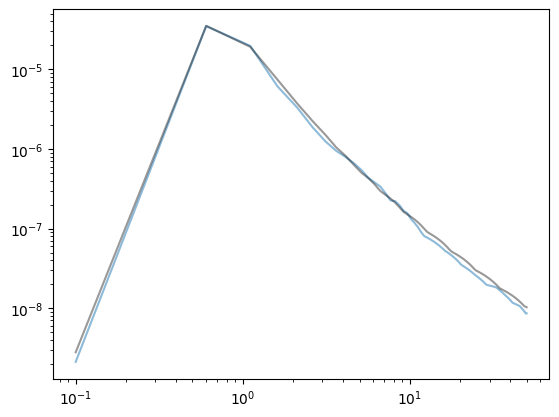

In [228]:
ax=plt.subplot()
ax.loglog(new_time, fluxd1, alpha=0.5)
#ax.loglog(new_time, fluxd2[0],alpha=0.5)
#ax.loglog(new_time, fluxd3[0],alpha=0.5)
#ax.loglog(new_time, fluxd4[0],alpha=0.5)
ax.loglog(new_time, tophat_redback(new_time, redshift=0.01,  thv= 0.5, loge0=49.5 , thc= 0.06, logn0=0.5, p=2.3, 
    logepse=-1.25, logepsb=-2.5, xiN=1, g0=1000,frequency= 3e14, output_format='flux_density'), c='k',alpha=0.4)# marker='o', markersize=2)
#plt.xlim(10,50)
#plt.ylim(10e-8,10e-5)
plt.show()

In [183]:
%%timeit
prediction= model.predict(xtests) #3#4

228 µs ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [184]:
%%timeit
prediction= model2.predict(xtests) #4#3

222 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [185]:
%%timeit
prediction= model3.predict(xtests) #2#1

225 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [187]:
%%timeit
prediction= model4.predict(xtests) #1#2

221 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [109]:
12160672.0*1e-9

0.012160672

In [110]:
765*1e-6

0.000765